In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
from sklearn.cluster import KMeans
from PIL import Image
import os
from skimage import io


In [4]:
# Load the image
img_path = r"D:\MINI\Image compression\image.png"
image = io.imread(img_path)

# Convert to float and normalize
image = image / 255.0  

# Get image shape
h, w, c = image.shape
print(f"Original Image Shape: {image.shape}")

# Reshape into 2D array (N, 3)
pixels = image.reshape(-1, 3)
print(f"Reshaped Image for Clustering: {pixels.shape}")


Original Image Shape: (183, 275, 3)
Reshaped Image for Clustering: (50325, 3)


In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

In [2]:
import numpy as np

def kmeans_from_scratch(pixels, K, max_iters=20, tol=1e-4):
    """
    Custom implementation of K-Means algorithm for image compression.
    
    pixels: numpy array of shape (num_pixels, 3)
    K: number of clusters
    max_iters: max number of iterations
    tol: tolerance for centroid movement (stopping condition)
    """
    # Step 1: Randomly initialize K centroids from the pixels
    np.random.seed(42)
    indices = np.random.choice(pixels.shape[0], K, replace=False)
    centroids = pixels[indices]

    for i in range(max_iters):
        # Step 2: Assign each pixel to the nearest centroid
        distances = np.linalg.norm(pixels[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 3: Recompute centroids
        new_centroids = np.array([
            pixels[labels == k].mean(axis=0) if np.any(labels == k) else centroids[k]
            for k in range(K)
        ])

        # Step 4: Check for convergence
        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tol:
            print(f"Converged in {i+1} iterations")
            break

        centroids = new_centroids

    return centroids, labels


In [5]:
# Choose number of clusters (colors)
K = 16  # Try 8, 16, 32 for different compression levels

print("Applying K-Means clustering...")
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(pixels)

# Get cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("K-Means clustering complete.")


Applying K-Means clustering...
K-Means clustering complete.


In [6]:
# Replace each pixel's color with its cluster centroid color
compressed_pixels = centroids[labels]

# Reshape back to image dimensions
compressed_image = compressed_pixels.reshape(h, w, 3)


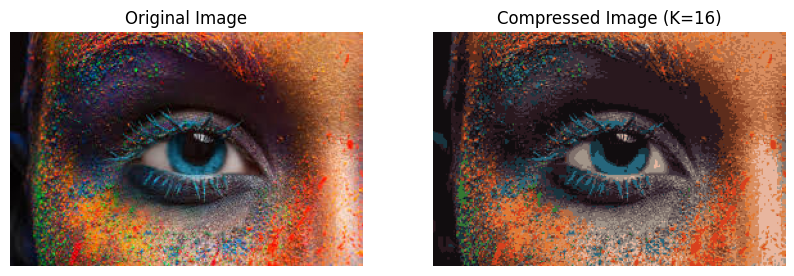

In [7]:
# Display Original and Compressed Images Side-by-Side
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.title(f"Compressed Image (K={K})")
plt.axis("off")

plt.show()


In [8]:
output_path = rf"D:\MINI\Image compression\compressed_{K}_colors.png"

# Save the compressed image
Image.fromarray(img_as_ubyte(compressed_image)).save(output_path)

print(f"Compressed image saved at: {output_path}")


Compressed image saved at: D:\MINI\Image compression\compressed_16_colors.png


In [9]:
# Check file sizes
original_size = os.path.getsize(img_path)
compressed_size = os.path.getsize(output_path)

print(f"Original File Size: {original_size / 1024:.2f} KB")
print(f"Compressed File Size: {compressed_size / 1024:.2f} KB")
print(f"Reduction: {100 * (original_size - compressed_size) / original_size:.2f}%")

# Number of colors used
print(f"Number of colors after compression: {K}")


Original File Size: 116.09 KB
Compressed File Size: 38.33 KB
Reduction: 66.98%
Number of colors after compression: 16
